# METHODOLOGY FOR ANALYSIS OF WELL LOG DATA

## 1. DATA LOADING

In [10]:
#IMPORT ALL NECESSARY LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from dataprep.eda import create_report

In [12]:
#LOAD WELL LOG FILE
file_path = "logs/well_6.txt"
train_data = np.loadtxt(file_path,skiprows=34)
train_data[train_data==-999.2500]=np.nan
labels =  ['DEPTH','CAL','NPHI','RHOB','GR','LLD9']
train_data = pd.DataFrame(train_data,columns=labels)
train_data

,DEPTH,CAL,NPHI,RHOB,GR,LLD9
0,4007.5,NaN,NaN,NaN,25.2703,0.0940
1,4008.0,NaN,NaN,NaN,26.1570,0.0952
2,4008.5,NaN,NaN,NaN,27.4651,0.0948
3,4009.0,NaN,NaN,NaN,28.6279,0.0915
4,4009.5,NaN,NaN,NaN,29.6599,0.0895
...,...,...,...,...,...,...
11852,9933.5,7.7227,0.3194,1.6849,NaN,NaN
11853,9934.0,7.7227,0.3194,1.6850,NaN,NaN
11854,9934.5,7.7227,0.3194,1.6850,NaN,NaN
11855,9935.0,7.7227,0.3194,1.6850,NaN,NaN


## 2. EXPLORATORY DATA ANALYSIS

### A. SUMMARY STATISTICS

In [13]:
train_data.describe()

,DEPTH,CAL,NPHI,RHOB,GR,LLD9
count,11857.000000,11835.000000,11835.000000,11835.000000,11822.000000,11815.000000
mean,6971.500000,13.027833,0.317402,2.164592,58.706795,24.724963
std,1711.482703,1.500058,0.073734,0.129638,26.002859,99.279520
min,4007.500000,7.722700,0.014700,1.312500,5.699100,0.059100
25%,5489.500000,12.132800,0.273100,2.111200,35.041425,1.360850
50%,6971.500000,12.273400,0.308700,2.156100,48.976700,5.486400
75%,8453.500000,13.515600,0.358000,2.235450,85.953500,23.460800
max,9935.500000,20.125000,0.641300,2.662300,120.314000,7844.328100


In [14]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11857 entries, 0 to 11856
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DEPTH   11857 non-null  float64
 1   CAL     11835 non-null  float64
 2   NPHI    11835 non-null  float64
 3   RHOB    11835 non-null  float64
 4   GR      11822 non-null  float64
 5   LLD9    11815 non-null  float64
dtypes: float64(6)
memory usage: 555.9 KB


### B. MISSING VALUE INFORMATION

In [15]:
#NO OF MISSING VALUES IN EACH COLUMN
train_data.isna().sum()

DEPTH     0
CAL      22
NPHI     22
RHOB     22
GR       35
LLD9     42
dtype: int64

In [16]:
#PERCENTAGE OF MISSING VALUES IN EACH COLUMN
missing_percentage = train_data.isnull().mean()*100
missing_percentage = missing_percentage.apply(lambda x: f'{x:.2f}%')
missing_percentage

DEPTH    0.00%
CAL      0.19%
NPHI     0.19%
RHOB     0.19%
GR       0.30%
LLD9     0.35%
dtype: object

### C. DATA VISUALIZATIONS

#### I. HEATMAP FOR CORRELATION OF FEATURES

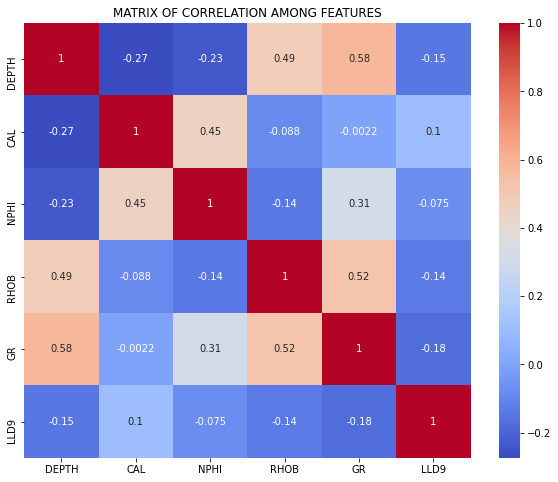

In [17]:
plt.figure(figsize=(10,8))
plt.title('MATRIX OF CORRELATION AMONG FEATURES')
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

#### II. HISTOGRAM PLOTS

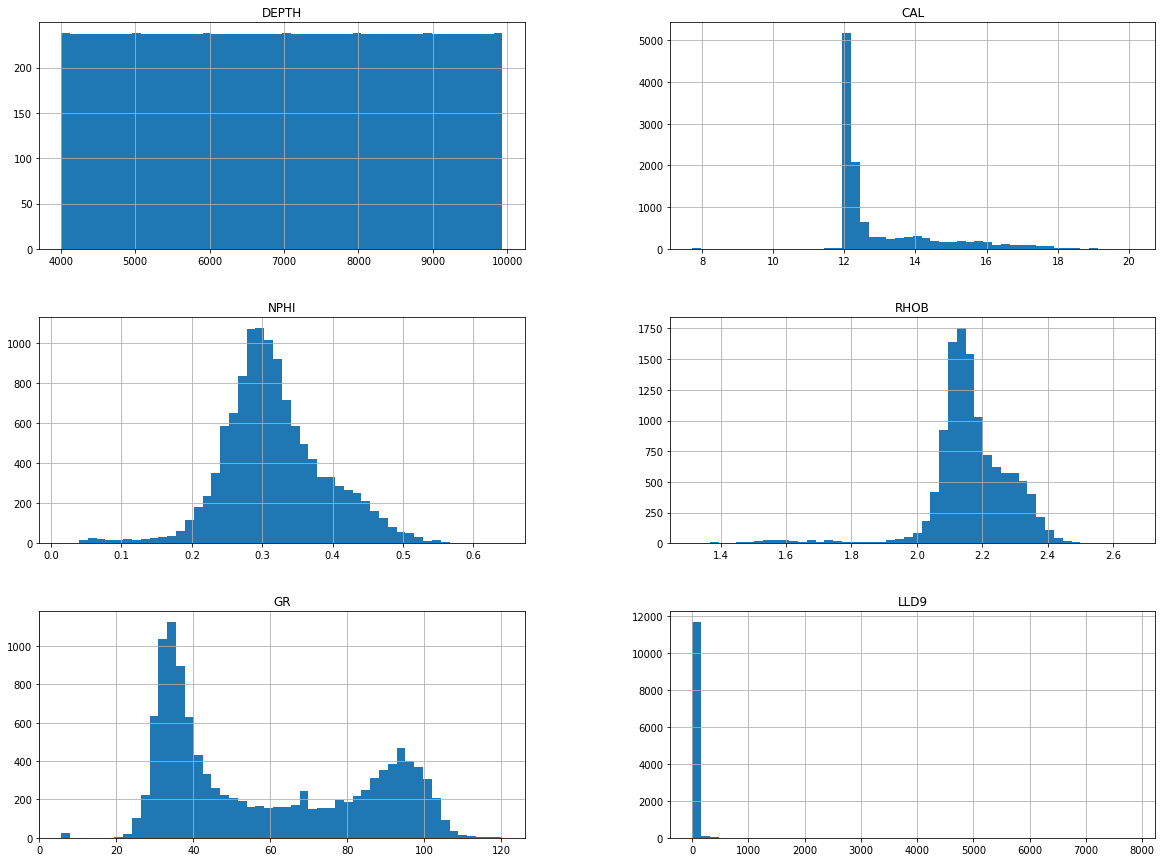

In [19]:
train_data.hist(bins=50, figsize=(20, 15))
plt.show()

#### III. BOX PLOTS 

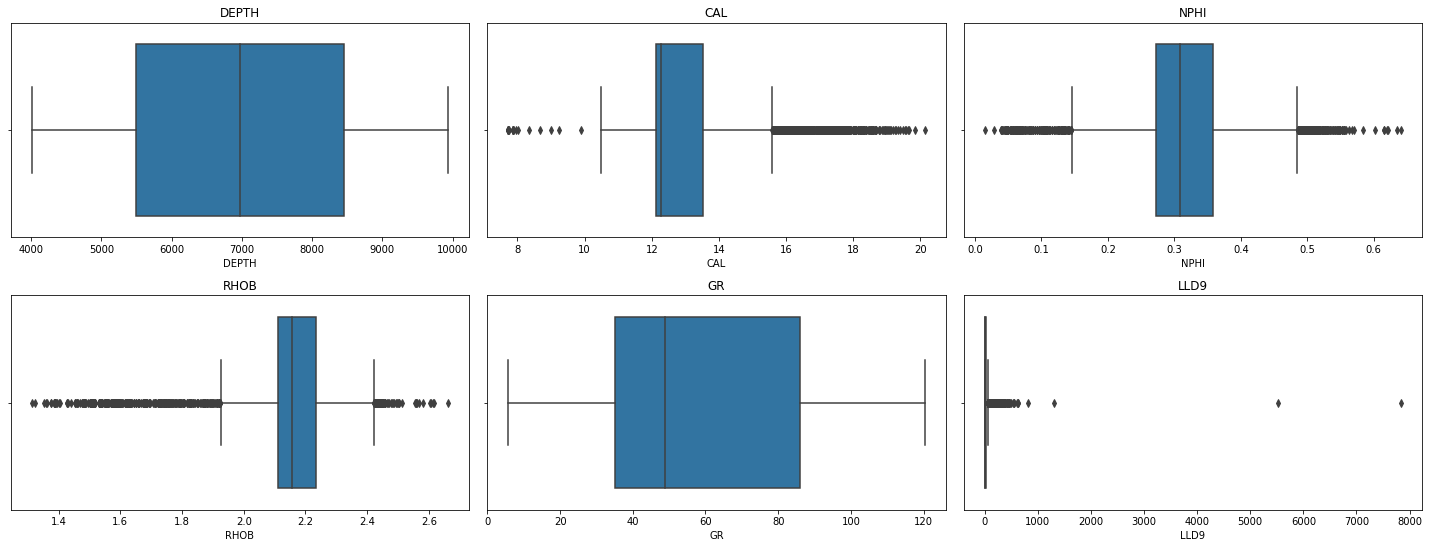

In [20]:
column_names = train_data.columns.tolist()
plt.figure(figsize=(20, 15))
for i, column in enumerate(train_data[column_names], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data= train_data, x=column)
    plt.title(column)

plt.suptitle('', fontsize=20)
plt.tight_layout()
plt.show()

## 3. PREPROCESSING/DATA CLEANING

### A. MISSING VALUE HANDLING

In [22]:
#Drop or fill missing values with mean
#train_data = train_data.apply(lambda col: col.fillna(col.mean()))
train_data = train_data.dropna()
train_data.isna().sum()

DEPTH    0
CAL      0
NPHI     0
RHOB     0
GR       0
LLD9     0
dtype: int64

In [23]:
train_data.shape

(11793, 6)

### B. OUTLIER REMOVAL

#### 1. Z-SCORE METHOD 
For normal distribution where outliers occur on both sides of the distribution

#### 2. Inter-Quartile Range IQR METHOD
For Skewed Distributions
* Use Inter-Quartile Range (IQR) proximity rule.
* The data points that fall below $Q1 – 1.5 IQR$ or above the third quartile $Q3 + 1.5 IQR$ are outliers, where $Q1$ and $Q3$ are the 25th and 75th percentile of the dataset, respectively. $IQR$ represents the inter-quartile range and is given by $Q3 - Q1$.

#### 3. PERCENTILE METHOD
This technique works by setting a particular threshold value, which is decided based on our problem statement.
Previous methods remove the outliers using capping, a method often known as Winsorization.
Here, we always maintain symmetry on both sides, meaning if we remove 1% from the right, the left will also drop by 1%.

In [24]:
#REMOVING OUTLIERS FOR CAL USING Z-SCORE
# 1. FINDING THE UPPER AND LOWER LIMITS
cal_upper_limit = train_data['CAL'].mean()+3*train_data['CAL'].std()
cal_lower_limit = train_data['CAL'].mean()-3*train_data['CAL'].std()
# 1. APPLYING CAPPING
train_data['CAL'] = np.where(
    train_data['CAL'] > cal_upper_limit, cal_upper_limit,
    np.where(train_data['CAL'] < cal_lower_limit, cal_lower_limit, train_data['CAL'])
)

# 3. REMOVING OUTLIERS FOR NPHI USING Z-SCORE
nphi_upper_limit = train_data['NPHI'].mean()+3*train_data['NPHI'].std()
nphi_lower_limit = train_data['NPHI'].mean()-3*train_data['NPHI'].std()

# 1. APPLYING CAPPING
train_data['NPHI'] = np.where(
    train_data['NPHI'] > nphi_upper_limit, nphi_upper_limit,
    np.where(train_data['NPHI'] < nphi_lower_limit, nphi_lower_limit, train_data['NPHI'])
)

# OUTLIER REMOVAL FOR LLD9 USING IQR
# 1. FIND THE IQR
LLD9_percentile25 = train_data['LLD9'].quantile(0.25)
LLD9_percentile75 = train_data['LLD9'].quantile(0.75)
LLD9_iqr = LLD9_percentile75 - LLD9_percentile25
# 2. FIND THE UPPER AND LOWER LIMITS
LLD9_upper_limit = LLD9_percentile75 + 1.5 * LLD9_iqr
LLD9_lower_limit = LLD9_percentile25 - 1.5 * LLD9_iqr
# 3. WINSORIZATION
train_data['LLD9'] = np.where(
    train_data['LLD9'] > LLD9_upper_limit,
    LLD9_upper_limit,
    np.where(
        train_data['LLD9'] < LLD9_lower_limit,
        LLD9_lower_limit,
        train_data['LLD9']))

# 2. REMOVING OUTLIERS FOR RHOB USING PERCENTILE
rhob_upper_limit = train_data['RHOB'].quantile(0.9)
rhob_lower_limit = train_data['RHOB'].quantile(0.1)
# APPLYING CAPPING
train_data['RHOB'] = np.where(train_data['RHOB'] >= rhob_upper_limit,
        rhob_upper_limit,
        np.where(train_data['RHOB'] <= rhob_lower_limit,
        rhob_lower_limit,
        train_data['RHOB']))

### C. RESULT 

#### 1. BOX PLOT

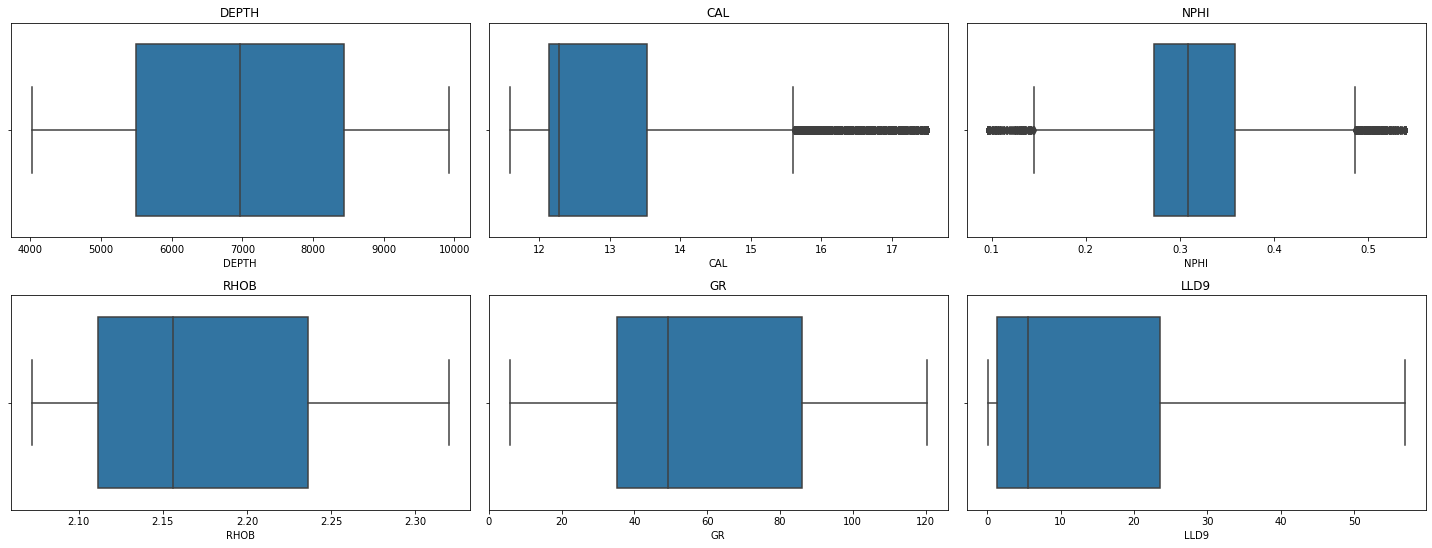

In [25]:
column_names = train_data.columns.tolist()
plt.figure(figsize=(20, 15))
for i, column in enumerate(train_data[column_names], 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data= train_data, x=column)
    plt.title(column)

plt.suptitle('', fontsize=20)
plt.tight_layout()
plt.show()

#### 2. HEATMAP CORRELATION OF FEATURES

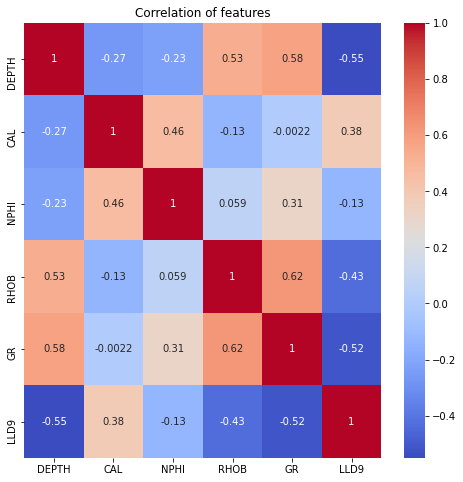

In [26]:
plot_size = 8
plt.figure(figsize=(plot_size,plot_size))
plt.title('Correlation of features')
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm')
plt.show()

## 4. WELL LOG VISUALIZATION

### A. BEFORE DESPIKING

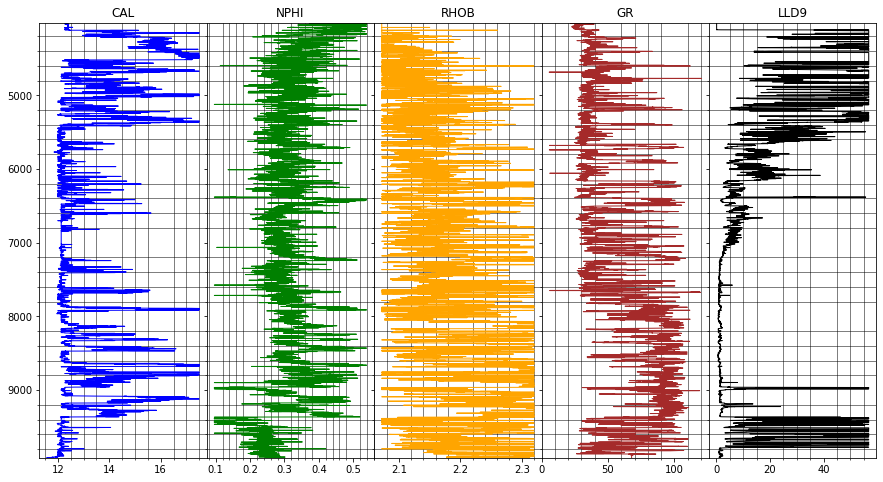

In [28]:
data = train_data.values
rows,cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,8), sharey=True)
labels = ['CAL','NPHI','RHOB','GR','LLD9']
color = ['blue','green','orange','brown','black']
for i in range(cols):
        ax[i].plot(data[:,i+1], data[:,0],linewidth='1',color=color[i])
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].minorticks_on()
        #ax[i].grid(which='major', linestyle='-', linewidth='0.5',color='green')
        ax[i].grid(which='minor', linestyle='-', linewidth='0.5',color='black')
        ax[i].set_title(labels[i])


plt.subplots_adjust(wspace=0)
plt.show()

### B. FILTERING OPERATION

In [29]:
filtered_data = train_data.copy()
from butterworth import  butter_lowpass_filter
filtered_data['RHOB'] = butter_lowpass_filter(filtered_data.RHOB.values,10,1000/1, order=5)
#filtered_data['SONIC'] = butter_lowpass_filter(filtered_data.SONIC.values,10,1000/1, order=5)
filtered_data['GR'] = butter_lowpass_filter(filtered_data.GR.values,10,1000/1, order=5)
filtered_data['LLD9'] = butter_lowpass_filter(filtered_data.LLD9.values,10,1000/1, order=5)
filtered_data['NPHI'] = butter_lowpass_filter(filtered_data.NPHI.values,10,1000/1, order=5)
filtered_data['CAL'] = butter_lowpass_filter(filtered_data.CAL.values,10,1000/1, order=5)
selected_columns = ['DEPTH', 'CAL', 'GR', 'LLD9', 'NPHI', 'RHOB']
filtered_data = filtered_data[selected_columns]
filtered_data

,DEPTH,CAL,GR,LLD9,NPHI,RHOB
22,4018.5,12.389345,25.522592,0.198473,0.389725,2.072117
23,4019.0,12.387620,25.655850,0.187327,0.393031,2.072115
24,4019.5,12.385917,25.788819,0.175347,0.396271,2.072112
25,4020.0,12.384241,25.921299,0.162549,0.399440,2.072108
26,4020.5,12.382596,26.053093,0.148953,0.402534,2.072103
...,...,...,...,...,...,...
11817,9916.0,11.982986,67.881466,1.652563,0.260540,2.277061
11818,9916.5,11.982885,67.878288,1.652274,0.260545,2.277035
11819,9917.0,11.982803,67.875693,1.652035,0.260549,2.277013
11820,9917.5,11.982735,67.873600,1.651840,0.260553,2.276995


### C. AFTER DESPIKING

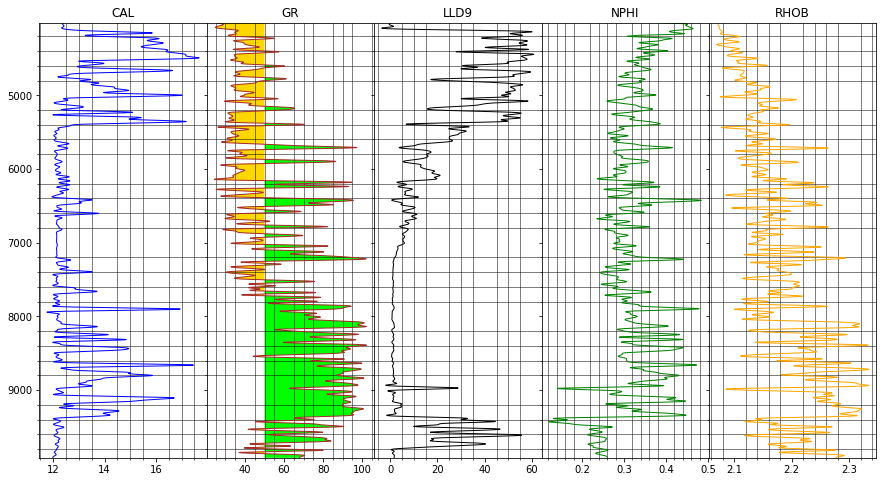

<Figure size 432x288 with 0 Axes>

In [32]:
data = filtered_data.values
rows,cols = 1,5
fig,ax = plt.subplots(nrows=rows, ncols=cols, figsize=(15,8), sharey=True)
labels = [ 'CAL', 'GR', 'LLD9', 'NPHI', 'RHOB' ]
color = ['blue','brown','black','green','orange']
for i in range(cols):
        ax[i].plot(data[:,i+1], data[:,0],linewidth='1',color=color[i])
        ax[i].set_ylim(max(data[:,0]), min(data[:,0]))
        ax[i].minorticks_on()
        #ax[i].grid(which='major', linestyle='-', linewidth='0.5',color='green')
        ax[i].grid(which='minor', linestyle='-', linewidth='0.5',color='black')
        ax[i].set_title(labels[i])

cl = 50
y2 = data[:,2]
y1 = y2*0+cl
ax[1].fill_betweenx(data[:, 0], y1, y2, where=(y1 >= y2), color='gold', linewidth=0)
ax[1].fill_betweenx(data[:, 0], y1, y2, where=(y1 < y2), color='lime', linewidth=0)
plt.subplots_adjust(wspace=0)
plt.show()
plt.subplots_adjust(wspace=0)
plt.show()

##### SAVE CLEANED DATA TO EXCEL FOR MODEL BUILDING

In [34]:
filtered_data.to_excel('lithofacies_clean_data.xlsx', index=False)